In [75]:
using Polynomials
push!(LOAD_PATH, pwd())
using Controlz
using Test
using Gadfly
using DifferentialEquations
using Logging
using DataFrames
using Colors

hipster_theme = Theme(default_color="orange", line_width=1mm, 
    major_label_font_size=14pt, minor_label_font_size=12pt, 
    panel_fill="ivory", minor_label_font="Courier", 
    major_label_font="Courier", point_size=4pt,
    key_label_font_size=12pt, key_label_font="Courier",
    point_shapes=[Shape.circle, Shape.xcross]);

Gadfly.push_theme(hipster_theme)

draw_origin =  [layer(Geom.hline(color="light gray", size=1pt), yintercept=[0.0]),
                layer(Geom.vline(color="light gray", size=1pt), xintercept=[0.0])]

colorz = Scale.color_discrete_manual(colorant"orange", colorant"lime green", colorant"royalblue1")

Gadfly.Scale.DiscreteColorScale(Gadfly.Scale.var"#58#59"{Array{RGB{FixedPointNumbers.Normed{UInt8,8}},1}}(RGB{FixedPointNumbers.Normed{UInt8,8}}[RGB{N0f8}(1.0,0.647,0.0), RGB{N0f8}(0.196,0.804,0.196), RGB{N0f8}(0.282,0.463,1.0)]), nothing, nothing, true)

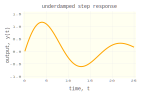

In [35]:
##
# second order, underdamped
K = 4.3
τ = 2.8
ξ = 0.2
g = K / (τ ^ 2 * s ^ 2 + 2 * τ * ξ * s + 1)
# impulse response
t, y = simulate(g, (0.0, 25.0))

function viz_response(t::Array{Float64}, y::Array{Float64}; title::String="")
    return plot(x=t, y=y, Geom.line, 
        Guide.xlabel("time, t"), 
        Guide.ylabel("output, y(t)"),
        Guide.title(title)
    )
end

viz_response(t, y, title="underdamped step response")

In [36]:
g = zeros_poles_gain([2*im, -2*im, 3], [-4, -5, -6], 13.0)

-130.0*s^3 + 390.0*s^2 - 520.0*s + 1560.0
-----------------------------------------
        s^3 + 15*s^2 + 74*s + 120

In [76]:
function viz_poles_and_zeros(tf::TransferFunction; coords_fixed::Bool=true)
    z, p, k = zeros_poles_gain(tf)

    df = DataFrame(re=Float64[], im=Float64[], pole_or_zero=String[])
    # load zeros
    for z_i in z
        push!(df, [real(z_i), imag(z_i), "zero"])
    end
    # load poles
    for p_i in p
        push!(df, [real(p_i), imag(p_i), "pole"])
    end
    sort!(df, :pole_or_zero) # necessary for label to be right in Gadfly
    
    return plot(layer(df, x=:re, y=:im, shape=:pole_or_zero, color=:pole_or_zero, hipster_theme),
        Guide.shapekey(title="", labels=sort(unique(df[:, :pole_or_zero]))),
        colorz,
        Guide.xlabel("Re"),
        Guide.ylabel("Im"),
        draw_origin...,
#         layer(Geom.hline(color="light gray", size=1pt), yintercept=[0.0]),
#         layer(Geom.vline(color="light gray", size=1pt), xintercept=[0.0]),
        Coord.Cartesian(fixed=coords_fixed)
    )
end

viz_poles_and_zeros (generic function with 1 method)

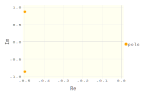

In [78]:
viz_poles_and_zeros(g, coords_fixed=false)

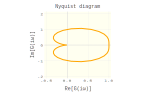

In [79]:
function viz_nyquist_diagram(tf::TransferFunction; nb_pts::Int=200)
    ω = range(-10.0, 10.0, length=nb_pts)

    g_iω = [evaluate(tf, ω_i * im) for ω_i in ω]
    return plot(x=real(g_iω),
         y=imag(g_iω), Geom.path,
         Guide.xlabel("Re[G(iω)]"),
         Guide.ylabel("Im[G(iω)]"),
         Guide.title("Nyquist diagram"),
         Coord.Cartesian(aspect_ratio=1.0),
         draw_origin...
        )
end

viz_nyquist_diagram(g)